###  CROSS_VAL

In [1456]:
from sklearn.model_selection import cross_val_predict

def stacking(models, meta_alg, X_train, y_train, X_test, random_state=17, cv=5):

    meta_mtrx = np.zeros((X_train.shape[0], len(models)))
    for n, model in enumerate(models):
        meta_mtrx[:, n] = cross_val_predict(model, X_train, y_train, cv=cv, method='predict') 
        model.fit(X_train, y_train)
    
    meta_alg.fit(meta_mtrx, y_train) 
    
    meta_mtrx_test = np.zeros((X_test.shape[0], len(models))) 
    for n, model in enumerate(models):
        meta_mtrx_test[:, n] = model.predict(X_test)
    
    predict_meta = meta_alg.predict_proba(meta_mtrx_test)[:, 1]

    return predict_meta

## Всякие полезности не примененные в курсовой

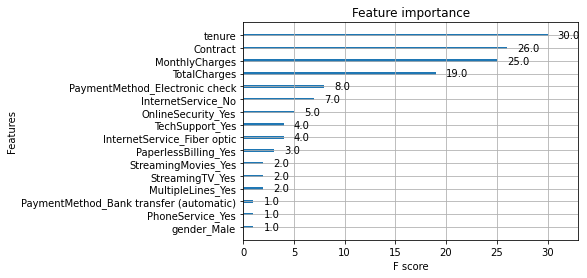

In [1617]:
importances = models[5].feature_importances_
feature_names = X.columns

qaz = pd.Series(importances, index=feature_names) 
bad_features = qaz[qaz == 0].index.tolist()

from xgboost import plot_importance

ax = plot_importance(models[5])

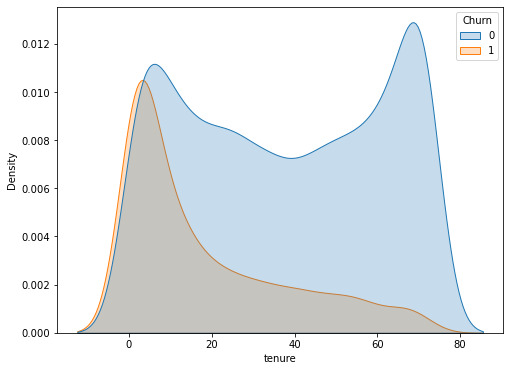

In [1245]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='tenure', hue='Churn', data=df, shade=True);

### Вот прям очень интересно ниже

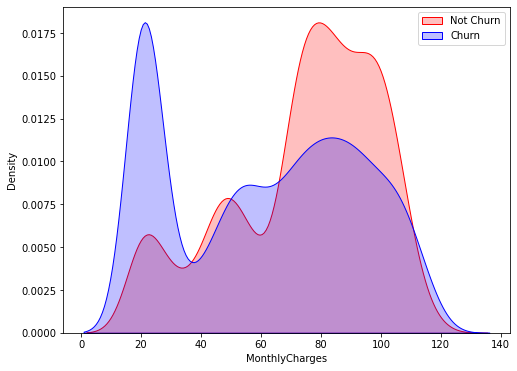

In [1246]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Churn'] == 1]["MonthlyCharges"], color='red', shade=True)
sns.kdeplot(df[df['Churn'] == 0]["MonthlyCharges"], color='blue', shade=True)
plt.legend(["Not Churn","Churn"],loc='upper right');

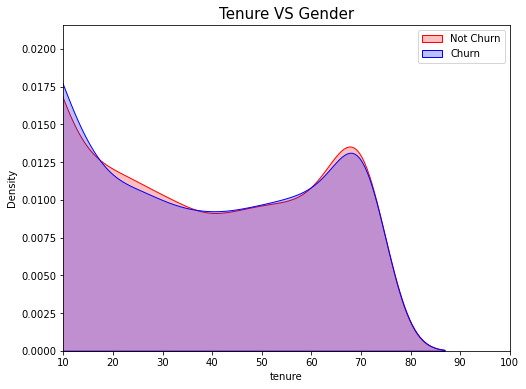

In [1253]:
plt.figure(figsize=(8,6))

sns.kdeplot(dumm_df[dumm_df['gender_Male'] == 1]["tenure"],  color="red", shade=True)
sns.kdeplot(dumm_df[dumm_df['gender_Male'] == 0]["tenure"],  color="blue", shade=True) 

plt.title('Tenure VS Gender', fontsize=15)
plt.legend(["Not Churn","Churn"],loc='upper right');   # ??? так ли это - про отток
plt.xlim([10,100])
plt.show()

In [1244]:
dumm_df['gender_Male'].value_counts()

1    3044
0    2932
Name: gender_Male, dtype: int64

In [1648]:
## GaussianProcessClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0, length_scale_bounds=(1e-5, 1e5))
gpc = GaussianProcessClassifier(kernel=kernel, random_state=17).fit(X_train, y_train)

y_hat = gpc.predict_proba(X_test)
roc_auc_score(y_test, y_hat[:, 1])

0.8371552736218143

In [ ]:
0.8388555132228417

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_score

param_grid = {'eps' : np.linspace(0.1,1, num=10), 'min_samples' : np.arange(2, 12, 1)}

model = DBSCAN()

for epsilon in np.linspace(0.1, 1, num=10):
    for semples_number in np.arange(2, 12, 1):
        model = DBSCAN(eps = epsilon, min_samples = semples_number).fit(X)
        if model.labels_.sum() != -model.labels_.shape[0]:
            print("silhouette_score =", silhouette_score(X, model.labels_), \
                  'eps = ', epsilon, 'min_samples =', semples_number)
        else : 
            print("все плохо, ", 'eps = ', epsilon, 'min_samples =', semples_number)

In [ ]:
# np.log  -   вопрос надо ли это делать не для линейных моделей?

qaz = df[['tenure', 'MonthlyCharges']].copy() 
qaz = qaz.apply(np.log)
df[['tenure', 'MonthlyCharges']] = qaz.copy()

In [ ]:
corr_matrix = dumm_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, center=0, annot=True)
plt.show()

#### Вариант 1  OneHotEncoder

In [346]:
from sklearn.preprocessing import OneHotEncoder 
# аналог pd.get_dummies(), но pd.get_dummies()не трогает колонки с 'np.number'

ohe = OneHotEncoder(drop='if_binary', sparse=False)
columns_list = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']

In [347]:
qaz = pd.DataFrame(ohe.fit_transform(df[obj_columns_list]))
df_1 = pd.concat([qaz, df[columns_list]], axis=1, ignore_index=True)

In [348]:
X = df_1.iloc[:, :-1]
y = df_1.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=17)
df_1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,72,24.10,0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,44,88.15,0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,38,74.95,1


In [350]:
score_matrix = []
for i, model in enumerate(models):
    gs_cv = GridSearchCV(model, models_params[i], cv=skf)
    models[i] = gs_cv.fit(X_train, y_train).best_estimator_
    score = roc_auc_score(y_test, models[i].predict_proba(X_test)[:, 1])
    score_matrix.append(score)
    print(models[i])
    print('   roc_auc_score = ', score, '\n')
    
print('\n', 'MAX_roc_auc_score = ', max(score_matrix))
print('MEAN_roc_auc_score = ', np.mean(score_matrix))

GradientBoostingClassifier(learning_rate=0.2, n_estimators=30, random_state=17)
   roc_auc_score =  0.8345617284543014 

LogisticRegression(C=0.7999999999999999, max_iter=1000, random_state=17)
   roc_auc_score =  0.8322097036816666 

SGDClassifier(alpha=1, loss='log', random_state=17)
   roc_auc_score =  0.7891662907905554 

KNeighborsClassifier(n_neighbors=6, p=1)
   roc_auc_score =  0.7951795088338883 

RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=20,
                       random_state=17)
   roc_auc_score =  0.8254367360517973 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='logloss', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
           

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(15,4))
df[['TotalCharges']].boxplot(ax=axis[0])
df[['MonthlyCharges', 'tenure']].boxplot(ax=axis[1])
plt.show()

In [ ]:
qaz = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']]
sns.pairplot(qaz, hue="Churn", corner=True, height=1.5)
plt.show()

In [ ]:
# df['TotalCharges'].astype(float) # но не преобразует пустые значения
# df['TotalCharges'].str.extract(r'(\d+.\d+)') # захват цифр
# df['TotalCharges'].str.extract(r'([0-9]+.[0-9]+)') 

In [ ]:
### Псомотрим влияние признаков

In [2199]:
from sklearn.feature_selection import mutual_info_regression

discrete_features = df_2.drop(columns = ['Churn']).dtypes == 'int64' # д.б. bool
discrete_features

gender               True
SeniorCitizen        True
Partner              True
Dependents           True
tenure               True
PhoneService         True
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
dtype: bool

In [2202]:
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)

mi_sc= pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_sc = mi_sc.sort_values(ascending=False)

In [2203]:
mi_sc.head(8)

Contract            0.099542
tenure              0.072057
TechSupport         0.059981
OnlineSecurity      0.056022
InternetService     0.048737
MonthlyCharges      0.045862
DeviceProtection    0.043866
OnlineBackup        0.035884
Name: MI Scores, dtype: float64

In [ ]:
"""
df_1['Summ_Dumm'] = df_1[['PhoneService_Yes', \
                          'MultipleLines_Yes', \
                          'InternetService_DSL', 'InternetService_Fiber optic', \
                          'OnlineSecurity_Yes', \
                          'OnlineBackup_Yes', \
                          'DeviceProtection_Yes', \
                          'TechSupport_Yes', \
                          'StreamingTV_Yes', \
                          'StreamingMovies_Yes', \
                          'Contract_One year', 'Contract_Two year', \
                          'PaperlessBilling_Yes', \
                          'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)']].\
                           sum(axis=1) * df_1['tenure']
"""

In [ ]:
## TotalCharges по сути есть произведение MonthlyCharges и tenure (плюс/минус 3% дополнительных платежей) 
print('Разница в % = ', \
      np.round(((np.abs(1-(df['TotalCharges']/(df['tenure']*df['MonthlyCharges'])))).sum()/df.shape[0])*100,2))

## и correlation почти 1
print('correlation TotalCharges vs. (MonthlyCharges * tenure) = ', \
      df['TotalCharges'].corr(df['tenure'] * df['MonthlyCharges']))

## удалим 'TotalCharges' 
df.drop(columns=['TotalCharges'], inplace=True) # (5976, 19)
df.reset_index(inplace=True, drop=True) # (5976, 19)

In [ ]:
##################################################################

In [1453]:
models_params = [gbc_params ,rfc_params ,lr_params, sgd_params, knc_params]
models = [gbc, rfc, lr, sgd, knc]

for i, model in enumerate(models):
    gs_cv = GridSearchCV(model, models_params[i], cv=skf) 
    models[i] = gs_cv.fit(X_train_0, y_train_0).best_estimator_ 
    print(models[i])
    print('   roc_auc_score = ', roc_auc_score(y_test_0, models[i].predict_proba(X_test_0)[:, 1]))

GradientBoostingClassifier(learning_rate=0.30000000000000004, n_estimators=20,
                           random_state=17)
   roc_auc_score =  0.843331626557433
RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=10,
                       random_state=17)
   roc_auc_score =  0.8351322751322751
LogisticRegression(C=0.5, max_iter=1000, random_state=17, solver='liblinear')
   roc_auc_score =  0.8409148318825738
SGDClassifier(alpha=0.1, loss='modified_huber', random_state=17)
   roc_auc_score =  0.7963201911589008
KNeighborsClassifier(n_neighbors=6, p=1)
   roc_auc_score =  0.8067622461170849


In [1454]:
matr_atr = np.zeros((X_test_0.shape[0], len(models)))

for i, model in enumerate(models):
    temp_predict = model.predict(X_test_0)
    matr_atr[:, i] = temp_predict

In [1455]:
meta_alg = XGBClassifier(use_label_encoder=False, eval_metric = 'auc', random_state=17) # eval_metric = 'logloss'

xgb_gs = GridSearchCV(meta_alg, xgb_params, cv=skf)
xgb_gs.fit(matr_atr, y_test_0)
xgb_gs.best_estimator_ 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [1457]:
y_pred = stacking(models, xgb_gs.best_estimator_, X_train, y_train, X_test, random_state=17, cv=5)
print('score_predict_proba = ', roc_auc_score(y_test, y_pred))

score_predict_proba =  0.7536787874716494


In [1445]:
gbc = GradientBoostingClassifier(random_state=17)
sgd = SGDClassifier(random_state=17)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state=17)
xgb = XGBClassifier(use_label_encoder=False, eval_metric = 'logloss', random_state=17)

models = [gbc, rfc, xgb, sgd, knc]
meta_alg = LogisticRegression(random_state=17, max_iter=1000)

In [1446]:
y_pred = stacking(models, meta_alg, X_train, y_train, X_test, random_state=17, cv=5)
print('score_predict_proba = ', roc_auc_score(y_test, y_pred))

score_predict_proba =  0.7741552384334124


In [1481]:
# LogisticRegression # быстро и хорошо

gs = GridSearchCV(lr, lr_params, cv=skf)
gs.fit(X_train, y_train)

y_pred = gs.best_estimator_.predict_proba(X_test)
print('score_predict_proba = ', roc_auc_score(y_test, y_pred[:, 1]))

score_predict_proba =  0.8251224396438934


In [1482]:
# GradientBoostingClassifier # быстро и хорошо

gs = GridSearchCV(gbc, gbc_params, cv=skf)
gs.fit(X_train, y_train)

y_pred = gs.best_estimator_.predict_proba(X_test)
print('score_predict_proba = ', roc_auc_score(y_test, y_pred[:, 1]))

score_predict_proba =  0.8367322130625746
